In [1]:
import pandas as pd
df = pd.read_csv("../datasets/car-prices.csv")

In [2]:
switch = {
  "yes" : 1,
  "no" : 0
}

df.sold = df.sold.map(switch)

In [3]:
df.drop(columns="Unnamed: 0", inplace=True)

In [4]:
import datetime

actual_year = datetime.date.today().year
df['age_car'] =  actual_year- df.model_year

In [5]:
df['km_per_year'] = df.mileage_per_year * 1.609344

In [6]:
df.drop(columns=['mileage_per_year', 'model_year'], inplace=True,axis=1)

In [7]:
x = df[['price', 'age_car', 'km_per_year']]
y = df['sold']

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


model = LinearSVC(random_state=20)

SEED = 20
x_train,x_test,y_train,y_test = train_test_split(x, y,random_state=20, test_size = 0.25, stratify=y)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"a acurácia do modelo foi de {accuracy:.2f}%")

a acurácia do modelo foi de 0.58%


c:\Users\mathi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [9]:
from sklearn.dummy import DummyClassifier
baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(x_train, y_train)
baseline.score(x_test, y_test)


0.58

In [14]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)

model.fit(x_train, y_train)
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print(f"a acurácia do modelo foi de {accuracy:.2f}%")

a acurácia do modelo foi de 0.76%


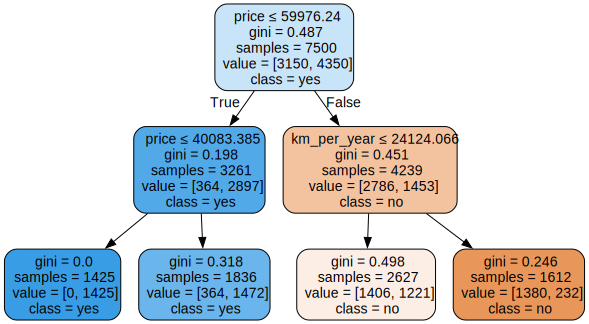

In [18]:
from sklearn.tree import export_graphviz
import graphviz
features = x.columns
dot_data = export_graphviz(model, feature_names=features, filled=True, rounded=True, special_characters=True, class_names=['no', 'yes'])
graph = graphviz.Source(dot_data)
graph
